<a href="https://colab.research.google.com/github/krystaldowling/MAST30034_Final_Project-/blob/CNN_Model/attempt2_CNN_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import statements
import pandas as pd




In [7]:
# Loading in preproccessed data
PATH = "/content/drive/My Drive/Data/"

# create dataframes and keep only necessary features to join dataframes
data = pd.read_csv(PATH + "preproccessed_data.csv", lineterminator='\n')

data

,title,text,label
0,muslims busted stole millions gov ’ benefits,print pay back money plus interest entire fami...,1
1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1
2,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1
3,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1
4,fantastic trumps 7 point plan reform healthcar...,email healthcare reform make america great sin...,1
...,...,...,...
29449,process analytical instruments market – techna...,technavio published new report global process ...,0
29450,travel deals get 1200 air credit two apt cookt...,apt offering savings new cape york outback wil...,0
29451,taiwanese recyclers belief waste simply mispla...,taipei taiwan sept 8 2015 prnewswire recent ye...,0
29452,season curtain raiser ideal way honour john,blackburn sunday league john haydock memorial ...,0


https://realpython.com/python-keras-text-classification/

In [8]:
from sklearn.model_selection import train_test_split

text = data['text'].values
label = data['label'].values

text_train, text_test, y_train, y_test = train_test_split(text, label, test_size=0.25, random_state=1000)


also stories click phrases see list subjects places carson city nevada — amount taxable sales nevada jumped 8 percent july compared month year ago nevada department taxation reported tuesday 43 billion taxable sales nevada july nearly 337 million taxes collected sales 85 million went state general fund general fund sales tax revenue coming slightly higher economists predicted would made economic forum forecast may sectors showing big gains included auto parts dealers sales 14 percent restaurant bar sales 9 percent food beverage store sales 10 percent


In [9]:
# calculate the maximum document length
def max_length(lines):
	return max([len(s.split()) for s in lines])
 
maxlen = max_length(data['text'])

In [10]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index


firearms panics happen variety things like acts domestic terrorism mass shootings democrats getting elected office though may worry years nd amendment enthusiast donald trumps decisive victory last night lets cover bases talk panic future democrats electedwhat panic ammo firearms panic people go buy items worried soon illegal buy sell items maybe already americans still believe ex post facto laws part constitutionadding panic speculators buy retailers roundly shamed raise prices resell privately much higher levels legal certainly isnt ethical decent thing folks deserve shamed mocked every opportunitylastly gun stores sites inventory handle flex buying demand manufacturer artificially contrived panic creates real scarcity corrected panic running steam everyone buys consider enough natural undercutting resets price back lower levelssome prices never return long rifle ammunition still totally recovered damage old brock islamic shock obama multiyear championship best firearms salesman ever

In [11]:
from keras.preprocessing.sequence import pad_sequences


X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


[  12  838 1375 ...    0    0    0]


In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [13]:
from keras.models import Sequential
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2202, 100)         19272700  
_________________________________________________________________
conv1d (Conv1D)              (None, 2198, 128)         64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 19,338,129
Trainable params: 19,338,129
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9987
Testing Accuracy:  0.8776


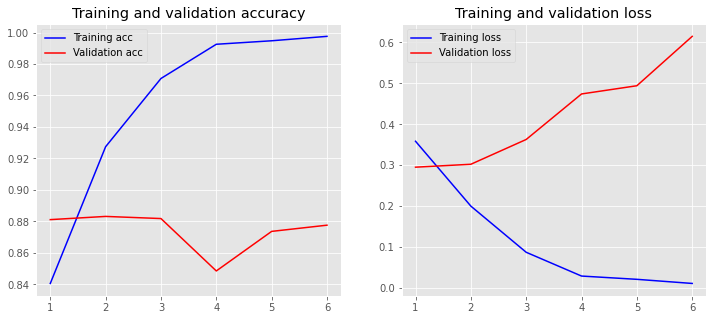

In [14]:
history = model.fit(X_train, y_train,
                    epochs = 10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


In [15]:
from keras.models import Sequential
from keras import layers

def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [19]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size= [vocab_size], 
                  embedding_dim=[50, 100],
                  maxlen= [maxlen])


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Run grid search for each source (yelp, amazon, imdb)
model = KerasClassifier(build_fn=create_model, epochs=6, batch_size=16, verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=10, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)

# Save and evaluate results
s = ('Running data set\nBest Accuracy : {:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
output_string = s.format( grid_result.best_score_, grid_result.best_params_, test_accuracy)
print(output_string)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
s = ('Running data set\nBest Accuracy : {:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
output_string = s.format( grid_result.best_score_, grid_result.best_params_, test_accuracy)
print(output_string)
       